# Determining ARMA(p,q) order by evaluating the ACF and PACF
The ACF and PACF can be used to determine the order of the ARMA(p,q) model. The ACF and PACF are computed by the `arma_order.py` script. The script stores the last lag time outside the confidence interval of the ACF and PACF as order q and p, respectively, in the `arma_order.nc` dataset. This is merely a visualization.

In [1]:
# import
import os
import numpy as np
import pandas as pd
import xarray as xr

import sys
sys.path.append('../code/')
from plots.master_colors import vas_cycle, fl_cycle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read dataset and list of glaciers
data_dir = '/Users/oberrauch/work/master/data/'
f_name = 'arma_order.nc'
ds = xr.load_dataset(os.path.join(data_dir, f_name))
showcase_glaciers = pd.read_csv(os.path.join(data_dir, 'showcase_glaciers.csv'), index_col=0)

In [13]:
ds

<xarray.Dataset>
Dimensions:    (model: 2, rgi_id: 6, temp_bias: 3)
Coordinates:
  * model      (model) object 'fl' 'vas'
  * temp_bias  (temp_bias) float64 -0.5 0.0 0.5
  * rgi_id     (rgi_id) object 'RGI60-11.00897' ... 'RGI60-11.01238'
Data variables:
    p          (rgi_id, temp_bias, model) int64 2 8 2 8 2 8 2 ... 11 2 7 7 7 3 7
    q          (rgi_id, temp_bias, model) int64 197 70 222 71 ... 127 59 116 60

Order of the **MA(q)** term

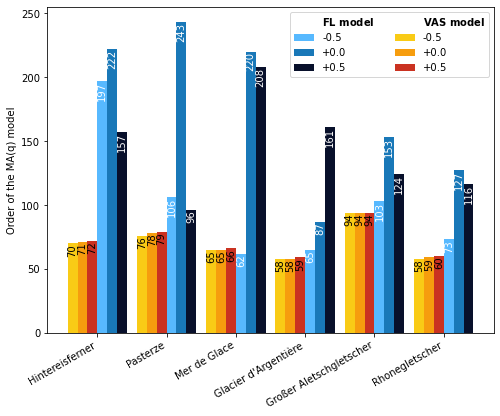

In [14]:
xticks=list()
width=2
plt.figure(figsize=[8,6])

for i, rgi_id in enumerate(ds.rgi_id):
    for j, temp_bias in enumerate(ds.temp_bias):
        q = ds.sel(rgi_id=rgi_id, temp_bias=temp_bias, model='fl').q
        x = i*((width)*3*width+width)+j*width+(width*1.5)
        xticks.append(x)
        plt.bar(x, q, width=width, color=fl_cycle[j],
                label=(f'{temp_bias.values:+.1f}' if not i else ''))
        
        plt.text(x, q, f'{q.values:d}', rotation=90, ha='center', va='top', color='w')

xticks = list()

for i, rgi_id in enumerate(ds.rgi_id):
    for j, temp_bias in enumerate(ds.temp_bias):
        q = ds.sel(rgi_id=rgi_id, temp_bias=temp_bias, model='vas').q
        x = i*((width)*3*width+width)+j*width-(width*1.5)
        xticks.append(x)
        plt.bar(x, q, width=width, color=vas_cycle[j],
                label=(f'{temp_bias.values:+.1f}' if not i else ''))
        
        plt.text(x, q, f'{q.values:d}', rotation=90, ha='center', va='top')
        
plt.xticks(np.array(xticks)[1::3]+(width*1.5), showcase_glaciers.loc[ds.rgi_id.values].values.flatten(), rotation=30, ha='right')

handles, labels = plt.gca().get_legend_handles_labels()
title_proxy, = plt.plot(0, marker='None', linestyle='None', label='dummy')
h = [title_proxy]
h.extend(handles[:3])
h.extend([title_proxy])
h.extend(handles[3:])
l = ['$\\bf{FL\ model}$']
l.extend(labels[:3])
l.extend(['$\\bf{VAS\ model}$'])
l.extend(labels[3:])

plt.legend(h,l, ncol=2)
# plt.title('MA(q) model')
plt.ylabel('Order of the MA(q) model')

plt.savefig('../plots/final_plots/arma/maq.pdf', bbox_inches='tight')

Order of the **AR(p)** term

In [15]:
ds.mean(dim=['rgi_id', 'temp_bias'])

<xarray.Dataset>
Dimensions:  (model: 2)
Coordinates:
  * model    (model) object 'fl' 'vas'
Data variables:
    p        (model) float64 3.278 9.111
    q        (model) float64 140.0 70.89

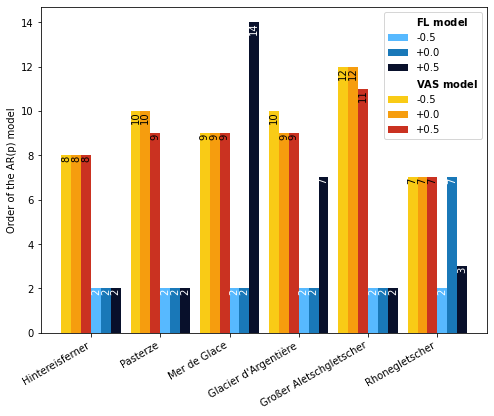

In [16]:
xticks=list()
width=2
plt.figure(figsize=[8,6])

for i, rgi_id in enumerate(ds.rgi_id):
    for j, temp_bias in enumerate(ds.temp_bias):
        p = ds.sel(rgi_id=rgi_id, temp_bias=temp_bias, model='fl').p
        x = i*((width)*3*width+width)+j*width+(width*1.5)
        xticks.append(x)
        plt.bar(x, p, width=width, color=fl_cycle[j],
                label=(f'{temp_bias.values:+.1f}' if not i else ''))
        
        plt.text(x, p, f'{p.values:d}', rotation=90, ha='center', va='top', color='w')

xticks = list()

for i, rgi_id in enumerate(ds.rgi_id):
    for j, temp_bias in enumerate(ds.temp_bias):
        p = ds.sel(rgi_id=rgi_id, temp_bias=temp_bias, model='vas').p
        x = i*((width)*3*width+width)+j*width-(width*1.5)
        xticks.append(x)
        plt.bar(x, p, width=width, color=vas_cycle[j],
                label=(f'{temp_bias.values:+.1f}' if not i else ''))
        
        plt.text(x, p, f'{p.values:d}', rotation=90, ha='center', va='top')
        
plt.xticks(np.array(xticks)[1::3]+(width*1.5), showcase_glaciers.loc[ds.rgi_id.values].values.flatten(), rotation=30, ha='right')

handles, labels = plt.gca().get_legend_handles_labels()
title_proxy, = plt.plot(0, marker='None', linestyle='None', label='dummy')
h = [title_proxy]
h.extend(handles[:3])
h.extend([title_proxy])
h.extend(handles[3:])
l = ['$\\bf{FL\ model}$']
l.extend(labels[:3])
l.extend(['$\\bf{VAS\ model}$'])
l.extend(labels[3:])
plt.legend(h, l, ncol=1)

# plt.title('AR(p) model')
plt.ylabel('Order of the AR(p) model')

plt.savefig('../plots/final_plots/arma/arp.pdf', bbox_inches='tight')

Same plots as above, only one for each evolution model... That's were I started and I kept them here in case I need them later on...

Text(0.5, 1.0, 'VAS model - AR(p) order')

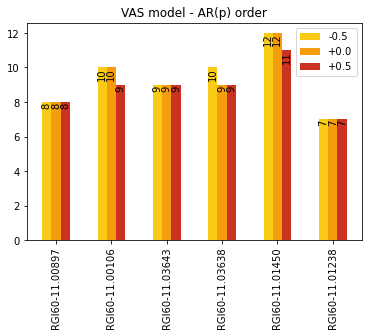

In [15]:
xticks=list()

for i, rgi_id in enumerate(ds.rgi_id):
    for j, temp_bias in enumerate(ds.temp_bias):
        p = ds.sel(rgi_id=rgi_id, temp_bias=temp_bias, model='vas').p
        width=0.5
        x = i*((width+0.5)*3)+j*width
        xticks.append(x)
        plt.bar(x, p, width=width, color=vas_cycle[j],
                label=(f'{temp_bias.values:+.1f}' if not i else ''))
        
        plt.text(x, p, f'{p.values:d}', rotation=90, ha='center', va='top')
        
plt.xticks(np.array(xticks)[1::3], ds.rgi_id.values, rotation=90)

plt.legend()
plt.title('VAS model - AR(p) order')

Text(0.5, 1.0, 'Flowline model - AR(p) order')

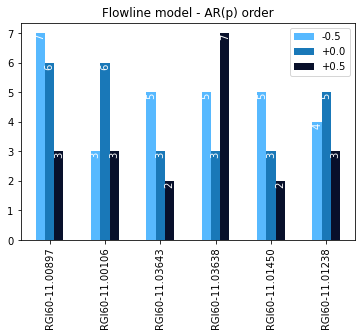

In [8]:
xticks=list()

for i, rgi_id in enumerate(ds.rgi_id):
    for j, temp_bias in enumerate(ds.temp_bias):
        p = ds.sel(rgi_id=rgi_id, temp_bias=temp_bias, model='fl').p
        width=0.5
        x = i*((width+0.5)*3)+j*width
        xticks.append(x)
        plt.bar(x, p, width=width, color=fl_cycle[j],
                label=(f'{temp_bias.values:+.1f}' if not i else ''))
        
        plt.text(x, p, f'{p.values:d}', rotation=90, ha='center', va='top', color='w')
        
plt.xticks(np.array(xticks)[1::3], ds.rgi_id.values, rotation=90)

plt.legend()
plt.title('Flowline model - AR(p) order')

Text(0.5, 1.0, 'VAS model - MA(q) order')

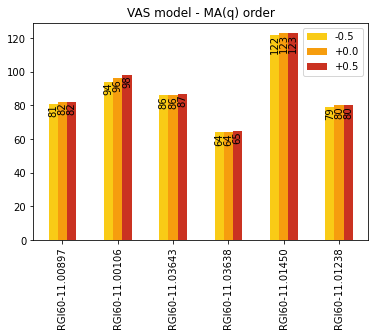

In [9]:
xticks=list()

for i, rgi_id in enumerate(ds.rgi_id):
    for j, temp_bias in enumerate(ds.temp_bias):
        q = ds.sel(rgi_id=rgi_id, temp_bias=temp_bias, model='vas').q
        width=0.5
        x = i*((width+0.5)*3)+j*width
        xticks.append(x)
        plt.bar(x, q, width=width, color=vas_cycle[j],
                label=(f'{temp_bias.values:+.1f}' if not i else ''))
        
        plt.text(x, q, f'{q.values:d}', rotation=90, ha='center', va='top')
        
plt.xticks(np.array(xticks)[1::3], ds.rgi_id.values, rotation=90)

plt.legend()
plt.title('VAS model - MA(q) order')